# Factor Modelling - Menthodology

#### https://www.datacamp.com/community/tutorials/introduction-factor-analysis

Factor analysis is a linear statistical model. It is used to explain the variance among the observed variable and condense a set of the observed variable into the unobserved variable called factors. Observed variables are modeled as a linear combination of factors and error terms (Source). Factor or latent variable is associated with multiple observed variables, who have common patterns of responses. Each factor explains a particular amount of variance in the observed variables. It helps in data interpretations by reducing the number of variables.


Factor analysis is a method for investigating whether a number of variables of interest X1, X2,……., Xl, are linearly related to a smaller number of unobservable factors F1, F2,..……, Fk.


Types of Factor Analysis

Exploratory Factor Analysis: It is the most popular factor analysis approach among social and management researchers. Its basic assumption is that any observed variable is directly associated with any factor.
Confirmatory Factor Analysis (CFA): Its basic assumption is that each factor is associated with a particular set of observed variables. CFA confirms what is expected on the basic.

How does factor analysis work?

The primary objective of factor analysis is to reduce the number of observed variables and find unobservable variables. These unobserved variables help the market researcher to conclude the survey. This conversion of the observed variables to unobserved variables can be achieved in two steps:

Factor Extraction: In this step, the number of factors and approach for extraction selected using variance partitioning methods such as principal components analysis and common factor analysis.
Factor Rotation: In this step, rotation tries to convert factors into uncorrelated factors — the main goal of this step to improve the overall interpretability. There are lots of rotation methods that are available such as: Varimax rotation method, Quartimax rotation method, and Promax rotation method.


#### https://zhuanlan.zhihu.com/p/87265813 | https://blog.csdn.net/The_Time_Runner/article/details/100118505 | https://www.joinquant.com/view/community/detail/6008dce93fb05ff1fc9f81ae9f7f6031

Winsorise, Neutralise, and Standardise

# Factor Modelling - Implementation

In [1]:
import numpy as np
import pandas as pd

## Load - Descriptors

In [ ]:
!pip install --upgrade pandas-profiling

In [2]:
%%time

file='data.csv'

data =pd.read_csv(file)

CPU times: user 23 ms, sys: 453 µs, total: 23.4 ms
Wall time: 286 ms


In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title=file +' - Dataset Profiling', explorative=True)
profile.to_file(output_file=file + " - Dataset Profiling.html")

In [ ]:
profile.to_notebook_iframe()

In [3]:
data = data.dropna()
data

,InstrumentTicker,InstrumentLongName,bicsSector,bicsIndustry,bicsSubIndustry,Momentum.PriceMovement,Size.marketCap,Quality.DebttoAssetRatio,Quality.ProfitMarginRatio,Quality.ROA,Quality.ROE,Quality.earningsPerShare,Yield.GrossDividendYield,Value.priceEarningsRatio,Value.priceToBookRatio,Value.priceToSalesRatio,Volatility.Beta (5Y Monthly),Volatility.Annualized Return,Volatility.Annualized Sharpe (Rf=0%),Volatility.Annualized Std Dev
2,SCHW,SCHWAB CHARLES CORP COM,Financials,Asset Management,Wealth Management,-0.5978,4.498221e+10,0.000005,0.010343,0.001675,0.021786,2.472589,2.060676,14.130937,1.460447,4.080270,1.25,-0.0461,-0.1313,0.3508
3,RHI,ROBERT HALF INTL INC COM,Consumer Discretionary,Commercial Services,Professional Services,-0.1672,6.042976e+09,0.000009,0.003761,0.039589,0.039589,3.190000,2.579177,16.529780,5.224297,1.052729,1.59,-0.0305,-0.0942,0.3240
6,ICE,INTERCONTINENTAL EXCHANGE INC,Financials,Institutional Financial Svcs,Security & Cmdty Exchanges,0.0508,5.270841e+10,0.000045,0.026744,0.004680,0.038096,3.834814,1.245847,25.117255,3.116085,9.774417,0.54,0.1561,0.6395,0.2441
9,MSFT,MICROSOFT CORP COM,Technology,Software,Infrastructure Software,0.5996,1.524042e+12,0.000078,0.000774,0.037178,0.094688,5.796067,1.013413,34.730448,12.882424,10.709154,0.93,0.3384,1.2250,0.2762
10,IBKR,INTERACTIVE BROKERS COM,Financials,Institutional Financial Svcs,Institutional Brokerage,0.2066,2.051362e+10,0.000091,0.009287,0.000381,0.003877,2.020000,0.810045,24.445545,2.506167,1.513274,0.63,-0.0039,-0.0118,0.3301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,CLX,CLOROX CO DEL COM,Consumer Staples,Consumer Products,Household Products,0.4038,2.859201e+10,0.009590,0.007581,0.041197,0.346763,6.820000,1.955603,33.290322,41.136063,4.490985,0.25,0.1553,0.7278,0.2134
253,BR,BROADRIDGE FINL SOLU COM,Technology,Technology Services,Payment & Data Processors,0.1110,1.507324e+10,0.009968,0.010677,0.033947,0.138711,4.311246,1.646091,30.450593,12.500258,3.441255,0.88,0.1826,0.7553,0.2417
260,ROL,ROLLINS INC COM,Consumer Discretionary,Commercial Services,Building Maintenance Services,0.3890,1.595572e+10,0.016859,0.018176,0.024425,0.054060,0.695167,0.657354,70.026339,19.935404,7.686221,0.42,0.1870,0.7603,0.2460
265,LW,LAMB WESTON HOLDINGS INC,Consumer Staples,Consumer Products,Packaged Food,-0.2315,9.899977e+09,0.020211,0.012680,0.032139,0.411982,3.254076,1.357132,20.832335,36.612261,2.514127,0.82,0.1895,0.5679,0.3336


## Transform - Winsorization

from scipy.stats.mstats import winsorize

lower_limit = 0.0
higher_limit = 0.05
data["Momentum.PriceMovement_winsorized"]=winsorize(data["Momentum.PriceMovement"], limits=[lower_limit, higher_limit])

print(data["Momentum.PriceMovement"].min())
print(data["Momentum.PriceMovement"].max())

print(data["Momentum.PriceMovement_winsorized"].min())
print(data["Momentum.PriceMovement_winsorized"].max())


In [4]:
def winsorize(factor, std=3, have_negative = True):
    '''
    factor: Series of index based on Ticker 
    std: standard deviation
    has_negative: bool
    '''
    r=factor.dropna().copy()
    if have_negative == False:
        r = r[r>=0]
    else:
        pass
   
    edge_up = r.mean()+std*r.std()
    edge_low = r.mean()-std*r.std()
    r[r>edge_up] = edge_up
    r[r< edge_low] = edge_low
    return r

data["Momentum.PriceMovement_winsorized"]=winsorize(data["Momentum.PriceMovement"])

print(data["Momentum.PriceMovement"].min())
print(data["Momentum.PriceMovement"].max())

print(data["Momentum.PriceMovement_winsorized"].min())
print(data["Momentum.PriceMovement_winsorized"].max())

## Transform - Standardization

In [5]:
def standardize(s,ty=2):
    '''
    s:Series
    ty:1 MinMax,2 Standard Z-score,3 maxabs
    '''
    data=s.dropna().copy()
    if int(ty)==1:
        re = (data - data.min())/(data.max() - data.min())
    elif ty==2:
        re = (data - data.mean())/data.std()
    elif ty==3:
        re = data/10**np.ceil(np.log10(data.abs().max()))
    return re

data["Momentum.PriceMovement_winsorized_standardised"]=standardize(data["Momentum.PriceMovement_winsorized"],2)
data["Momentum.PriceMovement_winsorized_standardised"]

## Transform - Neutralization

per Sector/Industry/SubIndustry/MarketCap
Can be improved

In [ ]:
!pip install --upgrade statsmodels

In [16]:
import math
import statsmodels.api as sm

In [7]:
def neutralization(factor,mkt_cap = False, industry = True):
    '''
    factor:Series
    mkt_cap: bool
    industry: bool
    '''
    y = factor
    
    if type(mkt_cap) == pd.Series and type(industry) == pd.Series:
        LnMktCap = mkt_cap.apply(lambda x:math.log(x))       
        dummy_industry = pd.get_dummies(industry, drop_first=True)
        x = pd.concat([LnMktCap,dummy_industry],axis = 1)
    elif type(mkt_cap) == pd.Series and type(industry) != pd.Series:
        LnMktCap = mkt_cap.apply(lambda x:math.log(x))
        x = LnMktCap
    elif type(mkt_cap) != pd.Series and type(industry) == pd.Series:
        dummy_industry = pd.get_dummies(industry, drop_first=True)
        x = dummy_industry
    else:
        pass
        
    result = sm.OLS(y,x, missing='drop').fit()
    return result.resid

In [8]:
# neutralization(data["Momentum.PriceMovement_winsorized_standardised"],data["Size.marketCap"],False)
# neutralization(data["Momentum.PriceMovement_winsorized_standardised"],False,data["bicsSubIndustry"])
# neutralization(data["Momentum.PriceMovement_winsorized_standardised"],data["Size.marketCap"],data["bicsSubIndustry"])

## Transform - Descriptor Standardisation

neutralization(standardize(winsorize(data["Momentum.PriceMovement"]),2),False,data["bicsSubIndustry"])

In [34]:
data_WSN = data.apply(lambda x: neutralization(standardize(winsorize(x),2),False,data["bicsSubIndustry"]) if np.issubdtype(x.dtype, np.number) else x)
data_WSN

,InstrumentTicker,InstrumentLongName,bicsSector,bicsIndustry,bicsSubIndustry,Momentum.PriceMovement,Size.marketCap,Quality.DebttoAssetRatio,Quality.ProfitMarginRatio,Quality.ROA,Quality.ROE,Quality.earningsPerShare,Yield.GrossDividendYield,Value.priceEarningsRatio,Value.priceToBookRatio,Value.priceToSalesRatio,Volatility.Beta (5Y Monthly),Volatility.Annualized Return,Volatility.Annualized Sharpe (Rf=0%),Volatility.Annualized Std Dev
2,SCHW,SCHWAB CHARLES CORP COM,Financials,Asset Management,Wealth Management,-5.980978e-01,2.923071e-01,-4.429787e-02,-6.780837e-02,-1.796955e-01,-1.375476e-01,-5.527253e-01,-0.280295,1.212298e-01,-2.287902e-02,3.066546e-01,-6.178376e-02,-1.026759e-01,-1.035673e-01,-1.047472e-01
3,RHI,ROBERT HALF INTL INC COM,Consumer Discretionary,Commercial Services,Professional Services,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,ICE,INTERCONTINENTAL EXCHANGE INC,Financials,Institutional Financial Svcs,Security & Cmdty Exchanges,6.925973e-01,3.152805e-01,-6.240283e-01,-1.718775e+00,-6.511651e-01,-4.801706e-02,-5.823347e-02,-0.126017,9.910332e-02,7.773007e-03,2.115286e-01,3.475336e-02,3.537505e-01,4.834133e-01,-1.202380e-01
9,MSFT,MICROSOFT CORP COM,Technology,Software,Infrastructure Software,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10,IBKR,INTERACTIVE BROKERS COM,Financials,Institutional Financial Svcs,Institutional Brokerage,-1.110223e-16,-4.440892e-16,-2.220446e-16,-1.665335e-16,-4.440892e-16,-3.330669e-16,-1.110223e-16,0.000000,-2.220446e-16,-3.330669e-16,-6.661338e-16,0.000000e+00,-4.440892e-16,-4.440892e-16,3.885781e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,CLX,CLOROX CO DEL COM,Consumer Staples,Consumer Products,Household Products,2.542770e-01,5.496064e-02,7.458318e-01,-1.675524e-01,2.694408e-01,1.346851e+00,6.321087e-01,0.290141,1.300981e-02,1.734840e+00,-2.986032e-02,-8.109118e-02,6.818320e-02,1.415647e-01,-7.966692e-02
253,BR,BROADRIDGE FINL SOLU COM,Technology,Technology Services,Payment & Data Processors,5.393988e-01,-2.854670e-01,2.127366e+00,-1.196679e-01,3.962804e-01,1.644269e-01,-2.873797e-02,-0.610965,2.090476e-01,1.479462e-01,-3.336057e-01,1.665335e-16,4.342334e-01,6.346795e-01,-2.326077e-01
260,ROL,ROLLINS INC COM,Consumer Discretionary,Commercial Services,Building Maintenance Services,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
265,LW,LAMB WESTON HOLDINGS INC,Consumer Staples,Consumer Products,Packaged Food,-6.762564e-01,-1.965551e-01,2.611993e+00,1.340777e-01,2.642230e-01,2.519918e+00,-2.579770e-01,-0.219556,-3.306605e-01,2.090758e+00,-2.531507e-01,1.164238e+00,4.167197e-01,1.222256e-01,1.043046e+00


## Transform - Descriptor Preparation

In [35]:
def Size_CubeSizeExposure(factor):
    r=factor**3
    return r

In [36]:
def Size_Log(factor):
    r= math.log(factor)
    return r

In [37]:
# data_WSN['Size.marketCapLog'] = data_WSN['Size.marketCap'].apply(lambda x: Size_Log(x))
data_WSN['Size.marketCapLog'] = data_WSN['Size.marketCap']
data_WSN['Size.CubeSizeExposure'] = data_WSN['Size.marketCapLog'].apply(lambda x: Size_CubeSizeExposure(x))

In [38]:
data_WSN

,InstrumentTicker,InstrumentLongName,bicsSector,bicsIndustry,bicsSubIndustry,Momentum.PriceMovement,Size.marketCap,Quality.DebttoAssetRatio,Quality.ProfitMarginRatio,Quality.ROA,...,Yield.GrossDividendYield,Value.priceEarningsRatio,Value.priceToBookRatio,Value.priceToSalesRatio,Volatility.Beta (5Y Monthly),Volatility.Annualized Return,Volatility.Annualized Sharpe (Rf=0%),Volatility.Annualized Std Dev,Size.marketCapLog,Size.CubeSizeExposure
2,SCHW,SCHWAB CHARLES CORP COM,Financials,Asset Management,Wealth Management,-5.980978e-01,2.923071e-01,-4.429787e-02,-6.780837e-02,-1.796955e-01,...,-0.280295,1.212298e-01,-2.287902e-02,3.066546e-01,-6.178376e-02,-1.026759e-01,-1.035673e-01,-1.047472e-01,2.923071e-01,2.497573e-02
3,RHI,ROBERT HALF INTL INC COM,Consumer Discretionary,Commercial Services,Professional Services,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
6,ICE,INTERCONTINENTAL EXCHANGE INC,Financials,Institutional Financial Svcs,Security & Cmdty Exchanges,6.925973e-01,3.152805e-01,-6.240283e-01,-1.718775e+00,-6.511651e-01,...,-0.126017,9.910332e-02,7.773007e-03,2.115286e-01,3.475336e-02,3.537505e-01,4.834133e-01,-1.202380e-01,3.152805e-01,3.133944e-02
9,MSFT,MICROSOFT CORP COM,Technology,Software,Infrastructure Software,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
10,IBKR,INTERACTIVE BROKERS COM,Financials,Institutional Financial Svcs,Institutional Brokerage,-1.110223e-16,-4.440892e-16,-2.220446e-16,-1.665335e-16,-4.440892e-16,...,0.000000,-2.220446e-16,-3.330669e-16,-6.661338e-16,0.000000e+00,-4.440892e-16,-4.440892e-16,3.885781e-16,-4.440892e-16,-8.758115e-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,CLX,CLOROX CO DEL COM,Consumer Staples,Consumer Products,Household Products,2.542770e-01,5.496064e-02,7.458318e-01,-1.675524e-01,2.694408e-01,...,0.290141,1.300981e-02,1.734840e+00,-2.986032e-02,-8.109118e-02,6.818320e-02,1.415647e-01,-7.966692e-02,5.496064e-02,1.660181e-04
253,BR,BROADRIDGE FINL SOLU COM,Technology,Technology Services,Payment & Data Processors,5.393988e-01,-2.854670e-01,2.127366e+00,-1.196679e-01,3.962804e-01,...,-0.610965,2.090476e-01,1.479462e-01,-3.336057e-01,1.665335e-16,4.342334e-01,6.346795e-01,-2.326077e-01,-2.854670e-01,-2.326310e-02
260,ROL,ROLLINS INC COM,Consumer Discretionary,Commercial Services,Building Maintenance Services,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
265,LW,LAMB WESTON HOLDINGS INC,Consumer Staples,Consumer Products,Packaged Food,-6.762564e-01,-1.965551e-01,2.611993e+00,1.340777e-01,2.642230e-01,...,-0.219556,-3.306605e-01,2.090758e+00,-2.531507e-01,1.164238e+00,4.167197e-01,1.222256e-01,1.043046e+00,-1.965551e-01,-7.593692e-03


## Transform - Combine Factor into Group with weightings

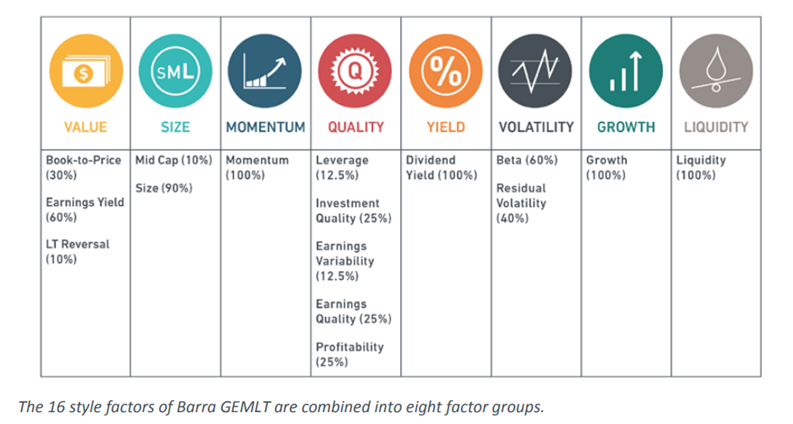

from statistics import mean  

In [40]:
# complete to be updated
data_WSN['Value']=data_WSN['Value.priceEarningsRatio']*0.6+data_WSN['Value.priceToBookRatio']*0.3+data_WSN['Value.priceToSalesRatio']*0.1

In [41]:
# complete
data_WSN['Size']=data_WSN['Size.marketCapLog']* 0.9 + data_WSN['Size.CubeSizeExposure']*0.1

In [42]:
# complete to be updated
data_WSN['Momentum']=data_WSN['Momentum.PriceMovement'] * 1

In [43]:
# complete to be updated
data_WSN['Quality']=data_WSN['Quality.DebttoAssetRatio']*-0.125+  neutralization(standardize(winsorize((data_WSN['Quality.ProfitMarginRatio']+data_WSN['Quality.ROA']+data_WSN['Quality.ROE'])),2),False,data["bicsSubIndustry"]) *0.25 +data_WSN['Quality.earningsPerShare']*0.25

In [44]:
# complete to be updated
data_WSN['Volatility']=data_WSN['Volatility.Beta (5Y Monthly)']*0.6 + data_WSN['Volatility.Annualized Std Dev']*0.4

In [45]:
# complete to be updated
data_WSN['Yield']=data_WSN['Yield.GrossDividendYield'] *1

In [46]:
data_Factor = data_WSN[['InstrumentTicker', 'InstrumentLongName','bicsSector','bicsIndustry','bicsSubIndustry','Momentum','Size','Quality','Value','Volatility','Yield']]
data_Factor

,InstrumentTicker,InstrumentLongName,bicsSector,bicsIndustry,bicsSubIndustry,Momentum,Size,Quality,Value,Volatility,Yield
2,SCHW,SCHWAB CHARLES CORP COM,Financials,Asset Management,Wealth Management,-5.980978e-01,2.655740e-01,-1.945010e-01,9.653963e-02,-7.896915e-02,-0.280295
3,RHI,ROBERT HALF INTL INC COM,Consumer Discretionary,Commercial Services,Professional Services,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
6,ICE,INTERCONTINENTAL EXCHANGE INC,Financials,Institutional Financial Svcs,Security & Cmdty Exchanges,6.925973e-01,2.868864e-01,-3.249892e-01,8.294675e-02,-2.724319e-02,-0.126017
9,MSFT,MICROSOFT CORP COM,Technology,Software,Infrastructure Software,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
10,IBKR,INTERACTIVE BROKERS COM,Financials,Institutional Financial Svcs,Institutional Brokerage,-1.110223e-16,-3.996803e-16,-1.127570e-17,-2.997602e-16,1.554312e-16,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
251,CLX,CLOROX CO DEL COM,Consumer Staples,Consumer Products,Household Products,2.542770e-01,4.948118e-02,2.975320e-01,5.252719e-01,-8.052148e-02,0.290141
253,BR,BROADRIDGE FINL SOLU COM,Technology,Technology Services,Payment & Data Processors,5.393988e-01,-2.592466e-01,-2.022542e-01,1.364519e-01,-9.304309e-02,-0.610965
260,ROL,ROLLINS INC COM,Consumer Discretionary,Commercial Services,Building Maintenance Services,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
265,LW,LAMB WESTON HOLDINGS INC,Consumer Staples,Consumer Products,Packaged Food,-6.762564e-01,-1.776590e-01,7.780595e-02,4.035162e-01,1.115761e+00,-0.219556


## Transform - Standardization

In [47]:
data_Factor_Std = data_Factor.apply(lambda x: standardize(x,2) if np.issubdtype(x.dtype, np.number) else x)  

In [48]:
data_Factor_Std

,InstrumentTicker,InstrumentLongName,bicsSector,bicsIndustry,bicsSubIndustry,Momentum,Size,Quality,Value,Volatility,Yield
2,SCHW,SCHWAB CHARLES CORP COM,Financials,Asset Management,Wealth Management,-0.918884,0.305499,-0.578125,0.202867,-0.195218,-0.488861
3,RHI,ROBERT HALF INTL INC COM,Consumer Discretionary,Commercial Services,Professional Services,0.009033,-0.024735,0.008661,0.019467,-0.024935,-0.015182
6,ICE,INTERCONTINENTAL EXCHANGE INC,Financials,Institutional Financial Svcs,Security & Cmdty Exchanges,1.083562,0.332000,-0.971792,0.177044,-0.083680,-0.228143
9,MSFT,MICROSOFT CORP COM,Technology,Software,Infrastructure Software,0.009033,-0.024735,0.008661,0.019467,-0.024935,-0.015182
10,IBKR,INTERACTIVE BROKERS COM,Financials,Institutional Financial Svcs,Institutional Brokerage,0.009033,-0.024735,0.008661,0.019467,-0.024935,-0.015182
...,...,...,...,...,...,...,...,...,...,...,...
251,CLX,CLOROX CO DEL COM,Consumer Staples,Consumer Products,Household Products,0.403531,0.036794,0.906279,1.017344,-0.198565,0.475135
253,BR,BROADRIDGE FINL SOLU COM,Technology,Technology Services,Payment & Data Processors,0.845882,-0.347100,-0.601515,0.278689,-0.225566,-1.047670
260,ROL,ROLLINS INC COM,Consumer Discretionary,Commercial Services,Building Maintenance Services,0.009033,-0.024735,0.008661,0.019467,-0.024935,-0.015182
265,LW,LAMB WESTON HOLDINGS INC,Consumer Staples,Consumer Products,Packaged Food,-1.040143,-0.245648,0.243392,0.786040,2.381010,-0.386217


##  Export - results

In [50]:
data_Factor_Std.to_csv('data_Factor.csv')